---
# **Introduction to Machine Learning**

# **Chapter 2.2 Data cleaning and feature engineering**
---

## Import libraries

In [1]:
import numpy as np                  # for scientific computing (e.g. culclations with array)
import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for visualization
import seaborn as sns               # for visualization

## Dataset loading

This dataset is from Kaggle.
For more information about this dataset, see
https://www.kaggle.com/datasets/camnugent/california-housing-prices


In [2]:
#Download dataset from Github
!wget https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/housing.csv

df_housing = pd.read_csv("housing.csv")     # making data frame object from csv file
df_housing

--2023-08-08 11:27:02--  https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.06s   

2023-08-08 11:27:02 (24.5 MB/s) - ‘housing.csv’ saved [1423529/1423529]



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

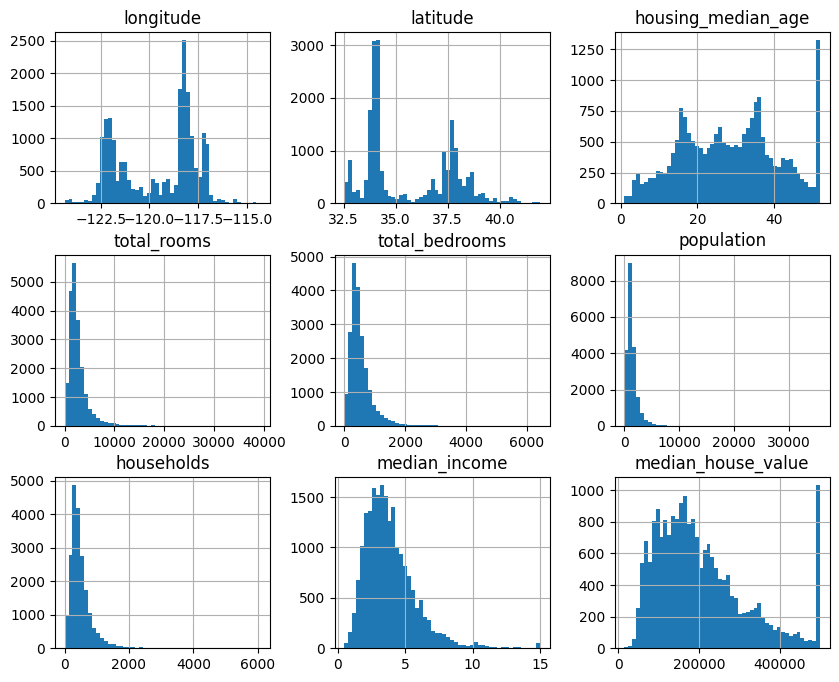

In [4]:
df_housing.hist(bins=50, figsize=[10,8])

In [5]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Inputation of missing values

In [6]:
#Drop the rows that has NA values
df_housing_dropped = df_housing.dropna(subset=["total_bedrooms"])

In [7]:
df_housing_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
#df_housing_filled = df_housing.fillna({"total_bedrooms" : 0})   # substitute with zero
#df_housing_filled = df_housing.fillna({"total_bedrooms" : 1})   # substitute with one

#Substitute with the average (Min, Max, Median)
inputation = df_housing.mean(numeric_only=True)  # min, max, mean, median are available
print(inputation)
df_housing_filled = df_housing.fillna({"total_bedrooms" : inputation["total_bedrooms"]})

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64


In [9]:
print(df_housing["total_bedrooms"].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool


In [10]:
df_housing[df_housing["total_bedrooms"].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [11]:
df_housing_filled[df_housing["total_bedrooms"].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,537.870553,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,537.870553,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,537.870553,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,537.870553,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,537.870553,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,537.870553,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,537.870553,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,537.870553,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,537.870553,2734.0,814.0,6.6073,258100.0,<1H OCEAN


## Dealing with categorical data

In [12]:
df_housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
dummies = pd.get_dummies(df_housing.ocean_proximity)
display(dummies.head())

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [14]:
df_housing_filled_dummies = pd.concat([df_housing_filled, dummies], axis=1)

display(df_housing_filled_dummies)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [15]:
df_housing_filled_dummies.drop(["ocean_proximity", "NEAR OCEAN"], axis=1, inplace=True)

display(df_housing_filled_dummies)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0


## Removing outliers

In [16]:
df_housing_clean = df_housing_filled_dummies.copy()

In [17]:
df_housing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  uint8  
 10  INLAND              20640 non-null  uint8  
 11  ISLAND              20640 non-null  uint8  
 12  NEAR BAY            20640 non-null  uint8  
dtypes: float64(9), uint8(4)
memory usage: 1.5 MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

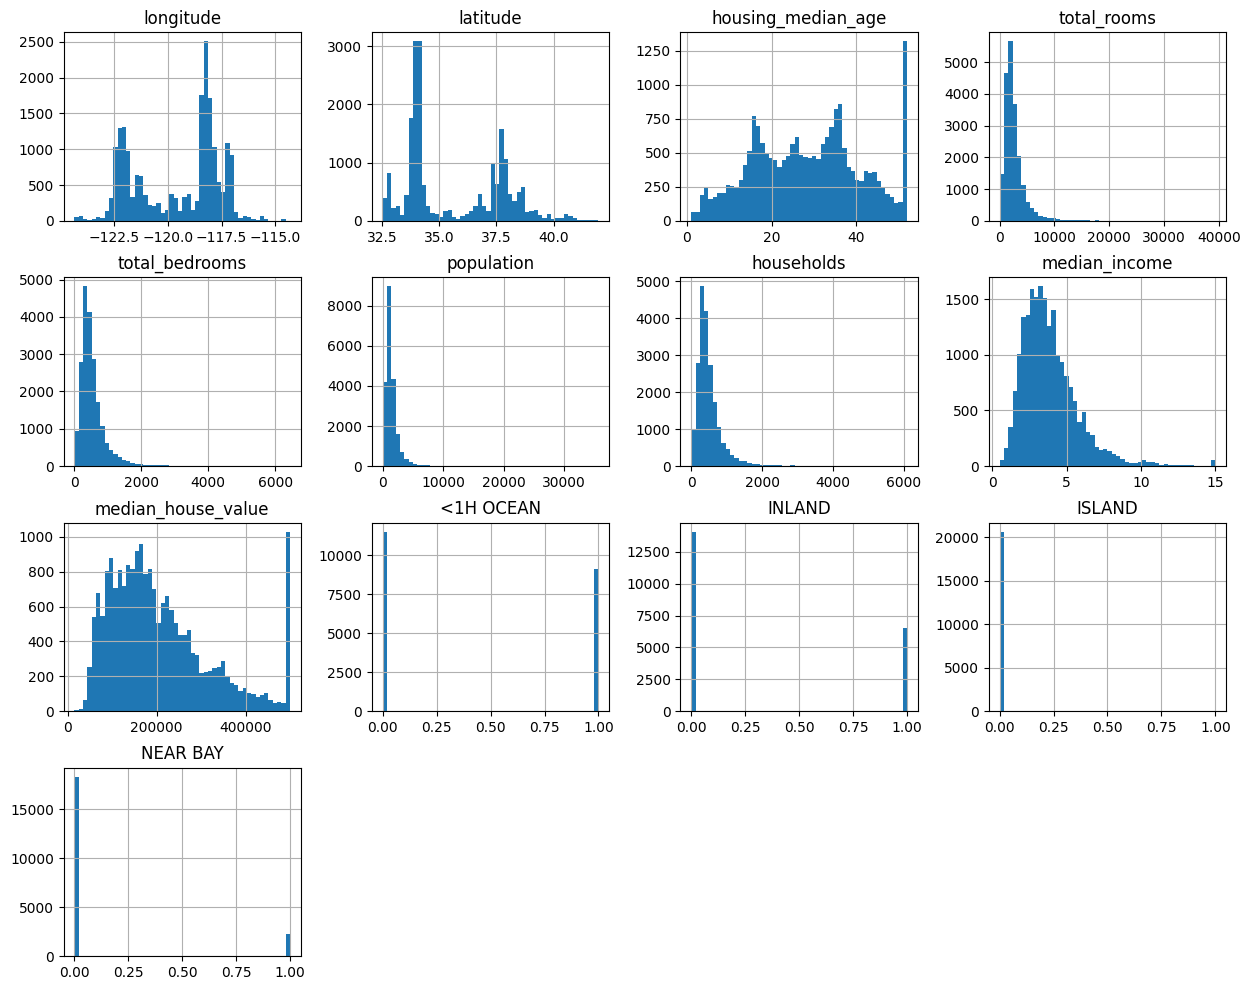

In [19]:
df_housing_clean.hist(bins=50, figsize=[15,12])

In [20]:
df_housing_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000


### Removing outliers in **median_house_val**

In [21]:
median_house_value_max = df_housing_clean["median_house_value"].max()
print(median_house_value_max)

500001.0


In [22]:
df_housing_clean.query("median_house_value < @median_house_value_max", inplace=True) # If inplace=True, this operation applies to the object itself

### Removing outliers in **housing_median_age**

In [23]:
housing_median_age_max = df_housing_clean["housing_median_age"].max()
print(housing_median_age_max)
df_housing_clean.query("housing_median_age < @housing_median_age_max", inplace=True)

52.0


###Removing outliers in **total_bedrooms, population, households and median_income**

In [24]:
# We will delete the samples which has a value of grater than ave+std*2
std = df_housing_clean.std()
ave = df_housing_clean.mean()
threshold = ave + std * 3

In [25]:
for col in ["total_bedrooms", "population", "households", "median_income"]:
    df_housing_clean = df_housing_clean[df_housing_clean[col] < threshold[col]]

## [Appendix] visualize location data

<Axes: xlabel='longitude', ylabel='latitude'>

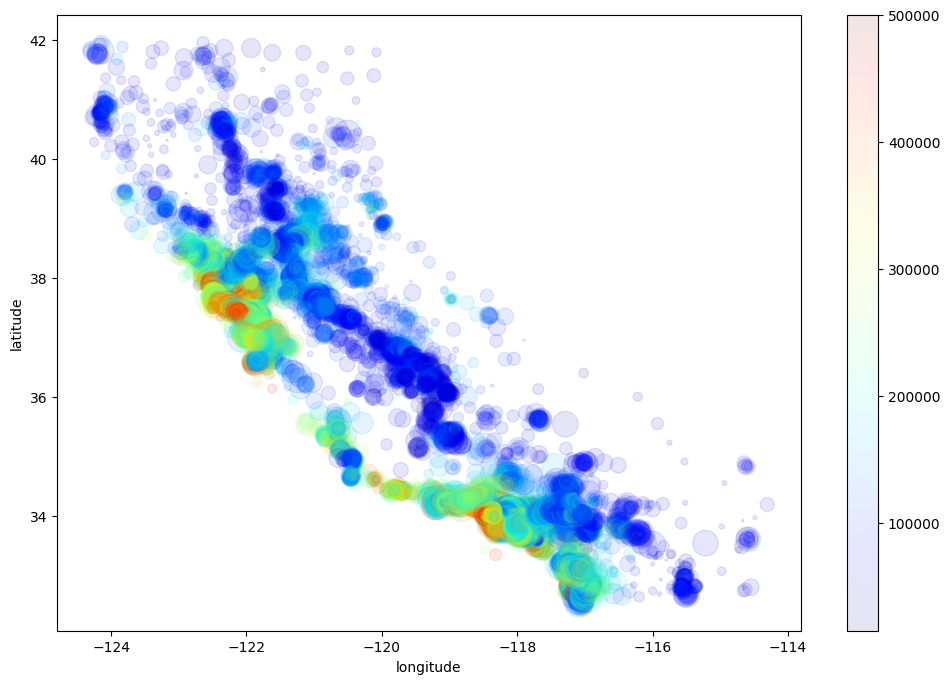

In [26]:
df_housing_clean.plot(
    x="longitude", y="latitude", kind="scatter",figsize = (12,8),
    s = df_housing_clean["population"]*0.1, alpha = 0.1,
    c = df_housing_clean["median_house_value"],
    cmap = plt.get_cmap("jet"),
    )

## Feature selection

In [27]:
df_housing_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17996 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17996 non-null  float64
 1   latitude            17996 non-null  float64
 2   housing_median_age  17996 non-null  float64
 3   total_rooms         17996 non-null  float64
 4   total_bedrooms      17996 non-null  float64
 5   population          17996 non-null  float64
 6   households          17996 non-null  float64
 7   median_income       17996 non-null  float64
 8   median_house_value  17996 non-null  float64
 9   <1H OCEAN           17996 non-null  uint8  
 10  INLAND              17996 non-null  uint8  
 11  ISLAND              17996 non-null  uint8  
 12  NEAR BAY            17996 non-null  uint8  
dtypes: float64(9), uint8(4)
memory usage: 1.4 MB


In [28]:
X = df_housing_clean[["longitude",
                      "latitude",
                      "housing_median_age",
                      "total_rooms",
                      "total_bedrooms",
                      "population",
                      "households",
                      "median_income",
                      "<1H OCEAN",
                      "INLAND",
                      "ISLAND",
                      "NEAR BAY"]].to_numpy()       # input (using multiple columns)

t = df_housing_clean["median_house_value"].to_numpy()                # target

## Dataset separation

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2)    # 20% out of all samples will be test dataset

print("X_train.shape =", X_train.shape)
print("t_train.shape =", t_train.shape)
print("X_test.shape =", X_test.shape)
print("t_test.shape =", t_test.shape)


X_train.shape = (14396, 12)
t_train.shape = (14396,)
X_test.shape = (3600, 12)
t_test.shape = (3600,)


## Normalization (Standardization)

Apply either Standardization or Normalization

In [30]:
# %matplotlib notebook
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Define a scaler for standardization
scaler = StandardScaler()
scaler.fit(X_train)     # Scaler should be fit to the training set
print("mean = ", scaler.mean_)
print("std = ", np.sqrt(scaler.var_))

# Define a scaler for normalization
# scaler = MinMaxScaler()
# scaler.fit(X_train)     # Scaler should be fit to the training set


# Execute standardization
std_X_train = scaler.transform(X_train)
std_X_test = scaler.transform(X_test)

print("min =", np.min(std_X_train, axis=0))
print("max =", np.max(std_X_train, axis=0))

mean =  [-1.19501598e+02  3.56078334e+01  2.73545429e+01  2.44871013e+03
  5.06028606e+02  1.35985968e+03  4.71288622e+02  3.63882253e+00
  4.47971659e-01  3.38288413e-01  1.38927480e-04  8.60655738e-02]
std =  [1.97748063e+00 2.15114269e+00 1.13438528e+01 1.53111028e+03
 3.01685390e+02 8.11397922e+02 2.78950526e+02 1.48228622e+00
 4.97285684e-01 4.73127216e-01 1.17859314e-02 2.80460854e-01]
min = [-2.42652305 -1.4261413  -2.32324444 -1.59799732 -1.67070936 -1.66855207
 -1.68233639 -2.11762242 -0.90083361 -0.71500519 -0.01178757 -0.30687197]
max = [ 2.62535955  2.94827796  2.08442912  6.47326975  4.35543595  4.43203048
  4.31155802  3.21312943  1.11008291  1.39859125 84.83513423  3.25868802]


## Run regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor   # K Nearest Neighbor Regression
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regression
from sklearn.svm import SVR                         # Support Vector Regression
from sklearn.neural_network import MLPRegressor     # Neural Netrowk (Multiple Layer Perceptron)

# Model definition (Choose one of the models below)
model = LinearRegression(fit_intercept = True)       # Linear regression model
#model = Ridge(alpha = 1.0, fit_intercept = True)    # Ridge regression model
#model = Lasso(alpha = 1.0, fit_intercept = True)    # Lasso regression model
#model = KNeighborsRegressor(n_neighbors=5)
#model = RandomForestRegressor(n_estimators=100)     # Random forest regression model
#model = SVR()                                       # Support Vector Regression model
#model = MLPRegressor(learning_rate_init=0.1)        # Neural network (Multi-Layer Perceptron) model

# Parameter optimization and prediction
model.fit(std_X_train, t_train)
y_train = model.predict(std_X_train)
y_test = model.predict(std_X_test)

# Model evaluation
R2_train = model.score(std_X_train, t_train)
R2_test = model.score(std_X_test, t_test)
mse_train = np.sqrt(np.average((t_train - y_train)**2))
mse_test = np.sqrt(np.average((t_test - y_test)**2))

#print("W =", model.coef_)
#print("b =", model.intercept_)
print("R^2(train) =", R2_train)
print("R^2(test) =", R2_test)
print("RMSE(train) =", mse_train)
print("RMSE(test) =", mse_test)

R^2(train) = 0.6217269938919237
R^2(test) = 0.629825118497633
RMSE(train) = 57912.1286955186
RMSE(test) = 58172.38625909064


##🤔 **Exercise 2.2**

Modify the above program to improve the prediction accuracy while considering the following various factors. Write down your best accuracy ($R^2$ and MSE) and summarize the various settings when the best accuracy was obtained.

- Data cleaning method
- Addition of new features (feature engineering)
- Machine learning model selection,
- Hyperparameter tuning

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor   # K Nearest Neighbor Regression
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regression
from sklearn.svm import SVR                         # Support Vector Regression
from sklearn.neural_network import MLPRegressor     # Neural Netrowk (Multiple Layer Perceptron)

# Model definition (Choose one of the models below)
#model = LinearRegression(fit_intercept = True)       # Linear regression model
#model = Ridge(alpha = 0.1, fit_intercept = True)    # Ridge regression model
#model = Lasso(alpha = 10, fit_intercept = True)    # Lasso regression model
#model = KNeighborsRegressor(n_neighbors=2)
model = RandomForestRegressor(n_estimators=150)     # Random forest regression model
#model = SVR()                                       # Support Vector Regression model
#model = MLPRegressor(learning_rate_init=1)        # Neural network (Multi-Layer Perceptron) model

# Parameter optimization and prediction
model.fit(std_X_train, t_train)
y_train = model.predict(std_X_train)
y_test = model.predict(std_X_test)

# Model evaluation
R2_train = model.score(std_X_train, t_train)
R2_test = model.score(std_X_test, t_test)
mse_train = np.sqrt(np.average((t_train - y_train)**2))
mse_test = np.sqrt(np.average((t_test - y_test)**2))

#print("W =", model.coef_)
#print("b =", model.intercept_)
print("R^2(train) =", R2_train)
print("R^2(test) =", R2_test)
print("RMSE(train) =", mse_train)
print("RMSE(test) =", mse_test)

R^2(train) = 0.9693902719196317
R^2(test) = 0.7961113893429855
RMSE(train) = 16473.90621135404
RMSE(test) = 43172.76752731883
